## Ejemplo de K-Nearest Neighbor

Importamos las librerias necesarias y creamos un objeto donde es almacenamos la url de nuestro archivo de entrenamiento .csv con los datos de entrenamiento para el algopritmo.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

url = 'https://raw.githubusercontent.com/dahrojasca/K-Nearest-Neighbor-python/master/reviews_sentiment.csv'



*   Leemos el archivo y observamos las primeras 10 entradas


In [16]:
df1 = pd.read_csv(url, on_bad_lines='skip', sep=';')
df1.head(10)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [17]:
df1.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


Son 257 registros. 
Las estrellas vemos que van del 1 al 5. 
La  cantidad de palabras van de 1 sóla hasta 103.
Las valoraciones de sentimiento están entre -2.27 y 3.26 con una media de 0,38 y a partir del desvío estándar podemos ver que la mayoría están entre 0,38-0,89 y 0,38+0,89.

---

Con las siguientes graficas podremos visualizar mejor la informacion.

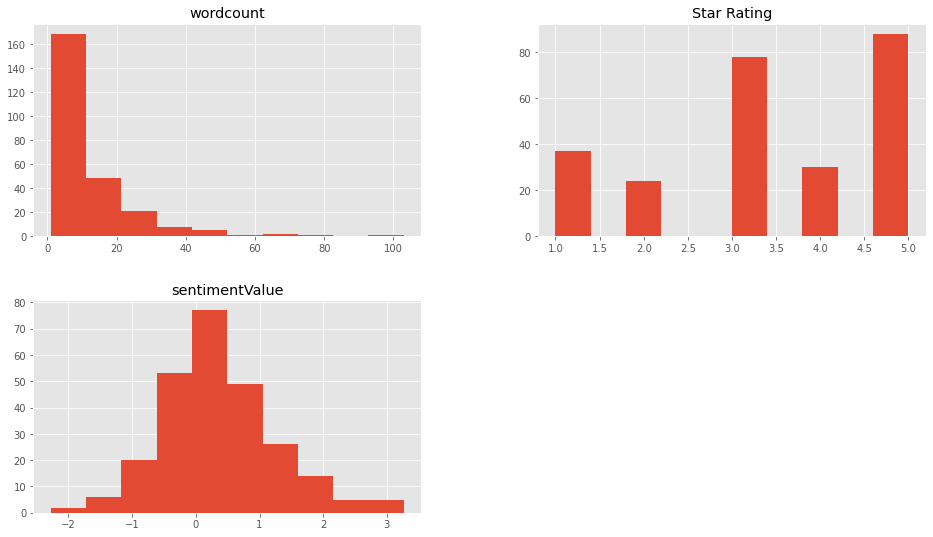

In [19]:
df1.hist()
plt.show()

La gráfica de Valores de Sentimientos parece bastante una 'campana' corrida levemente hacia la derecha del cero y la cantidad de palabras se centra sobre todo de 0 a 10.

---

Veamos cuantas valoraciones de estrellas hay en total.


In [20]:
print(df1.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


Se confirma que la gran mayoria son calificaciones de 3 y 5 estrellas.

Una mejor grafica para su visualizacion seria asi:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


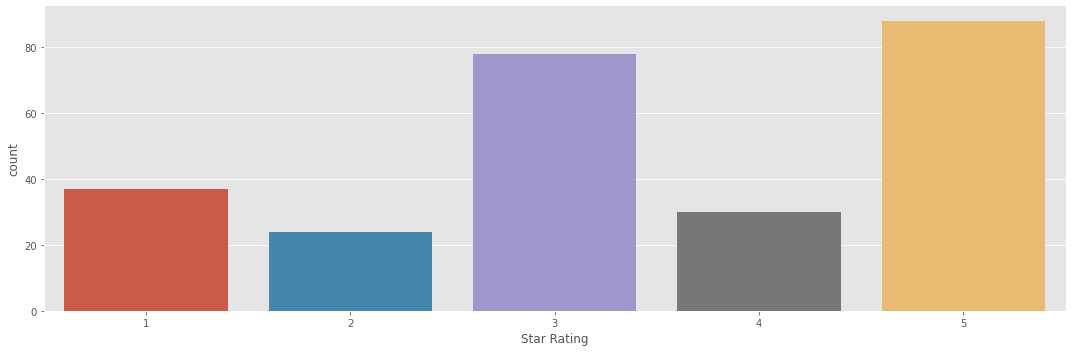

In [25]:
sb.catplot('Star Rating', data=df1,kind='count',aspect=3)

Ahora graficamos la cantidad de palabras y confirmamos que la mayoria osciilan entre 1 y 10 palabras.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


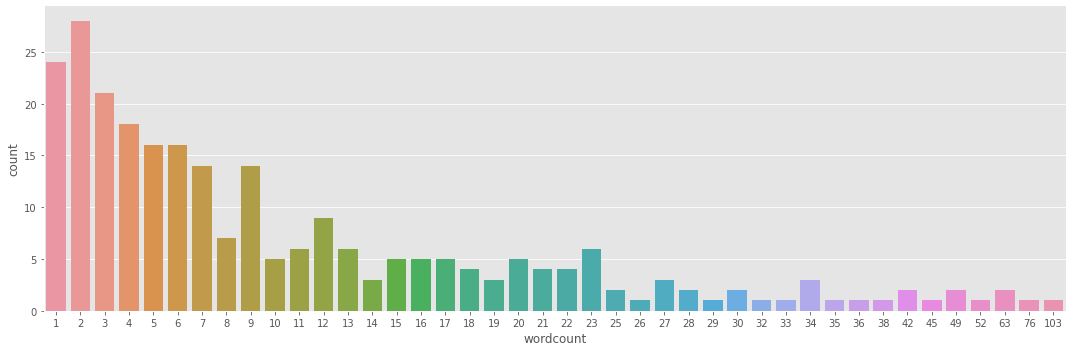

In [27]:
sb.catplot('wordcount', data=df1,kind='count',aspect=3)

### Preparamos las entradas
Creamos nuestro X e Y de entrada y los sets de entrenamiento y pruebas.

In [28]:
X = df1[['wordcount','sentimentValue']].values
y = df1['Star Rating'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Usamos k-Nearest Neighbor con Scikit Learn para la crecion del modelo.
Se define el valor de k en 7 y creamos el clasificador.

In [29]:
n_neighbors = 7
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Exactitud del calsificador K-NN en el set de entrenamiento: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Exactitud del calsificador K-NN en el set de pruebas: {:.2f}'
     .format(knn.score(X_test, y_test)))

Exactitud del calsificador K-NN en el set de entrenamiento: 0.90
Exactitud del calsificador K-NN en el set de pruebas: 0.86


Observamos que la precision es del 90% para el set de entrenamiento y del 86% para el de pruebas.

Scikit Lear tambien tiene la clase KneigborsRegressor para etiquetas con valores continuos, puesto que nuestras etiquetas son valores discretos usamos KneighborsClassifier.

###Resultados obtenidos

In [30]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



### Grafica de la clasificacion obtenida
Realizaremos la grafica con la clasificacion obtenida con la cual podemos ver donde caeran las predicciones.

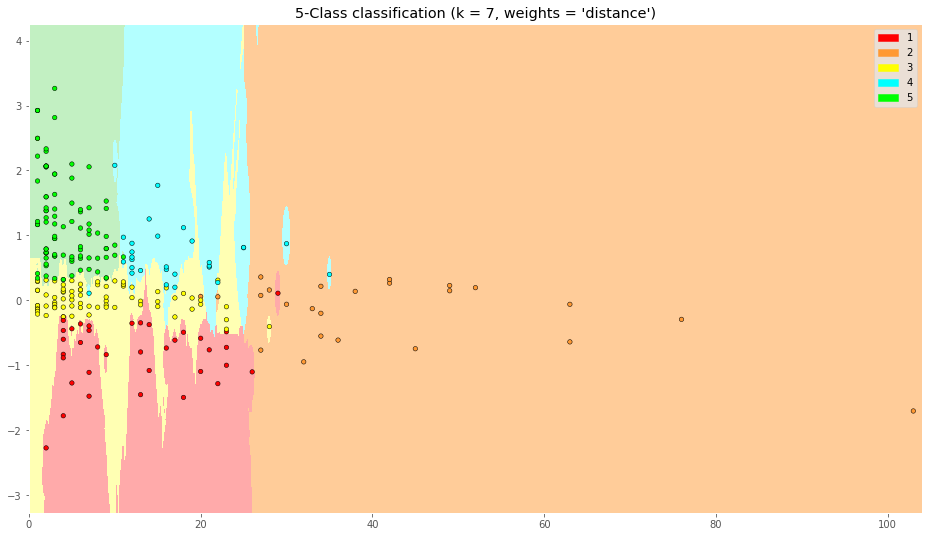

In [31]:
h = .02  # Tamano de paso en la malla

# Creacion de los colores del mapa
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# Creamos una instancia de Neighbors Classifier y ajustamos los datos.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Pintamos la grafica de el limite de decision a la cual cada una se le asigna un color
# punto en la malla [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Ponemos el resultado en una grafica coloreada.
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Graficamos tambien los puntos de entrenamiento.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

    
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))

plt.show()

Se distinguen 5 regiones que podriamos visualizar asi:

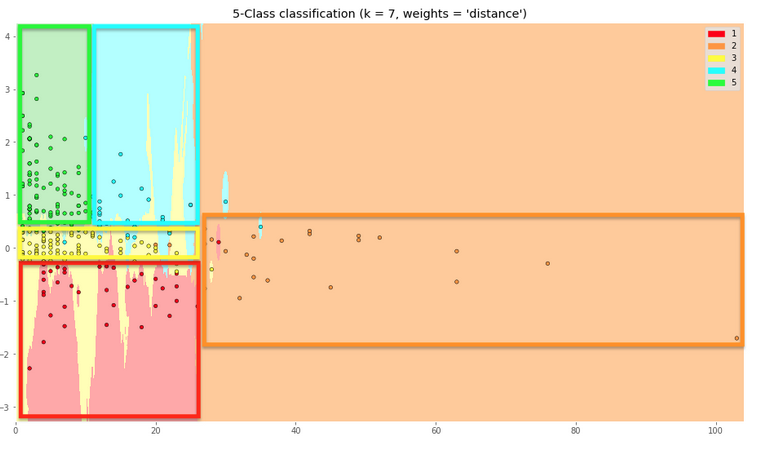

### Como obtener el mejor valor de k

([<matplotlib.axis.XTick at 0x7f8398695d50>,
 <a list of 5 Text major ticklabel objects>)

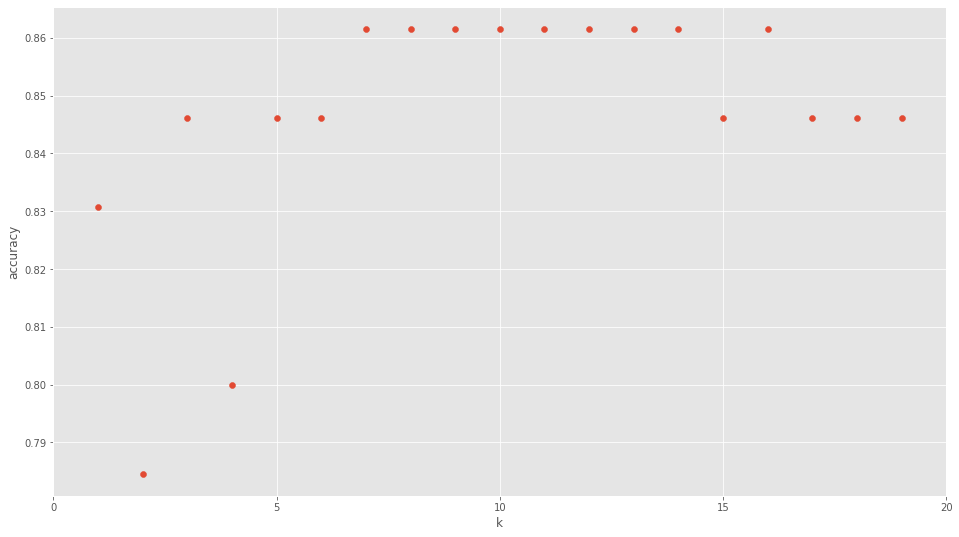

In [32]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])



##Predicciones

In [33]:
print(clf.predict([[5, 1.0]]))

[5]


In [34]:
print(clf.predict_proba([[20, 0.0]]))

[[0.00381998 0.02520212 0.97097789 0.         0.        ]]
